In [42]:
import xarray as xr
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import numpy as np
import statsmodels.api as sm  # For empirical CDF
from scipy import stats

jtplot.style(theme='grade3')

plt.rcParams['figure.figsize'] = (12, 5)

In [40]:
# User-Supplied
file = '/glade/p/work/manab/ff/islandpark/output/001_001_runs_def.nc'   # Fuse output file
out = xr.open_dataset(file)
Q = out.groupby('time.year').max()
#print(out2)
#Q = out2['q_routed']
#print(Q)
#Q['logQ'] = np.log10(Q['q_routed'])   #Convert discharge Q to lognormal values
#Qsort = sorted(out['logQ'])

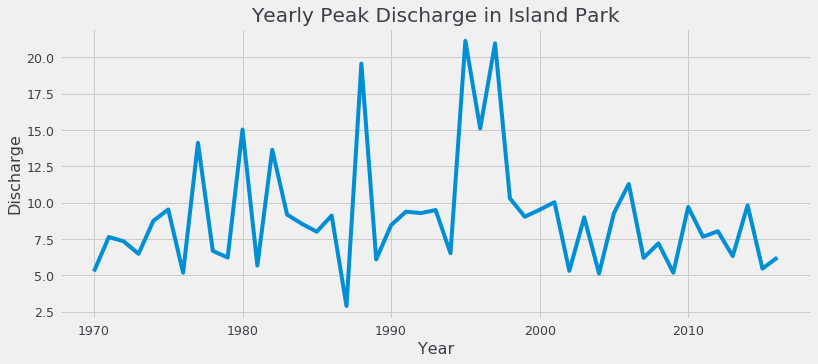

NameError: name 'Qsort' is not defined

In [41]:
Q['q_routed'].plot()
plt.style.use('fivethirtyeight')
plt.ylabel('Discharge', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Yearly Peak Discharge in Island Park')
plt.show()

Qsort.plot()
plt.ylabel('Discharge (log10 values)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.title('Yearly lognormal Peak Discharge in Island Park')
plt.show()


out['q_routed'].groupby('time.year').max().plot.hist()
plt.show()

# Frequency and Relative Histogram

In [43]:
Q.hist(bins=10, edgecolor='#4aaaaa')
plt.ylabel('Frequency')
plt.xlabel('Discharge (CMS)')
plt.title('Frequency Histogram of Discharge in Island Park')
plt.show()

Q.hist(weights=np.zeros_like(gdat['Q']) + 1. / gdat.size, edgecolor='#4aaaaa')
plt.ylabel('Relative frequency')
plt.xlabel('Discharge (CMS)')
plt.title('Relative Frequency Histogram of Discharge in Island Park')
plt.show()

AttributeError: 'Dataset' object has no attribute 'hist'

In [4]:
Q = out['q_routed']
Q.groupby('time.year').max()

<xarray.DataArray 'q_routed' (year: 47)>
array([  5.259126,   7.631361,   7.334279,   6.474031,   8.746142,   9.525013,
         5.173643,  14.117498,   6.677956,   6.216399,  15.026334,   5.665174,
        13.636866,   9.173225,   8.539213,   7.997893,   9.108199,   2.886152,
        19.564276,   6.090576,   8.44698 ,   9.376502,   9.277175,   9.486653,
         6.517096,  21.13381 ,  15.101697,  20.95845 ,  10.293676,   9.02948 ,
         9.507259,  10.02674 ,   5.300549,   8.981009,   5.117909,   9.267587,
        11.280639,   6.194591,   7.194488,   5.172569,   9.697832,   7.649008,
         8.026397,   6.32177 ,   9.811336,   5.454472,   6.218011])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 ...

# Cumulative Distribution Function (CDF)

In [ ]:
gdat['Q'].hist(weights=np.zeros_like(gdat['Q']) + 100. / gdat['Q'].size, cumulative=True,edgecolor='#4aaaaa')
plt.plot(np.sort(gdat['Q']), np.linspace(0, 100, len(gdat['Q']), endpoint=False))
plt.ylabel('Cumulative frequency (%)')
plt.xlabel('Discharge class intervals (CMS)')
plt.title('Empirical CDF of the Discharge in Haridwar')
plt.show()

# Descriptive Statistics

In [ ]:
n, min_max, mean, var, skew, kurt = stats.describe(gdat['Q'])
median = np.median(gdat['Q'])
std = np.sqrt(var)

print('''The Peak Annual Discharge (in CMS) statistics for the Ganga River have the following characteristics:
Count: {0}
Min/Max flows: {1}
Mean: {2}
Median: {3}
Standard Deviation: {4}
Variance: {5}
Skewness: {6}
Kurtosis: {7}'''.format(n, min_max, mean, median, std, var, skew, kurt))

# Fitting Various Distributions

In [22]:
distnormal = stats.norm.pdf(Q, loc = mean, scale = std) #Normal distribution
distlognormal = stats.pearson3.pdf(Q, skew = 1, loc = mean, scale = std) #Pearson Type 3 distribution
distweibull = stats.dweibull.pdf(Q, c = 1, loc = mean, scale = std) #Weibull distribution

NameError: name 'stats' is not defined

In [23]:
gdat['Q'].hist(edgecolor='#4aaaaa', density = True)
plt.plot(Q, distnormal, color = 'red', label='Normal Distribution')
plt.plot(Q, distlognormal, color = 'blue', label='Lognormal Distribution')
plt.plot(Q, distweibull, color = 'green', label='Weibull Distribution')
plt.legend()
plt.show()

NameError: name 'gdat' is not defined